In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
import sys
project_root = os.path.abspath(os.path.join(os.getcwd(), '../../'))
sys.path.append(project_root)
from configLoader import config 

In [3]:
# Define functions
def calculate_distribution(df, bin_size):
    df['length'] = df['Feedback'].apply(len)
    df['length_bin'] = (df['length'] // bin_size) * bin_size
    length_distribution = df['length_bin'].value_counts().reset_index()
    length_distribution.columns = ['length_bin', 'frequency']
    return length_distribution

def plot_feedback_length_distribution(length_distribution, bin_size):
    plt.figure(figsize=(10, 6))
    plt.bar(length_distribution['length_bin'], length_distribution['frequency'], width=bin_size)
    plt.xlabel('Feedback Length')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Feedback Length (bin size = {bin_size})')
    plt.grid(True)
    plt.show()

def plot_pie_chart(df, column, title, threshold):
    # Calculate percentages
    data = df[column].value_counts(normalize=True) * 100
    # Group small percentages into 'Other'
    large_data = data[data >= threshold]
    small_data_sum = data[data < threshold].sum()
    if small_data_sum > 0:
        data = pd.concat([large_data, pd.Series([small_data_sum], index=['Other'])])
    # Plot pie chart
    fig, ax = plt.subplots(figsize=(9, 6))
    sizes = data.values
    labels = data.index
    # Create a pie chart without labels
    wedges, _ = ax.pie(
        sizes, startangle=140, 
        colors=plt.cm.Paired(range(len(data))),
        wedgeprops=dict(width=0.4)
    )
    # Create a table with labels and percentages
    label_pct = [f'{label}: {size:.1f}%' for label, size in zip(labels, sizes)]
    
    plt.gca().legend(
        wedges, label_pct, title=column.capitalize(), loc="center left",
        bbox_to_anchor=(1, 0, 0.5, 1), fontsize='small'
    )
    plt.title(title)
    plt.show()

def load_data(topic, SRC_DIR):
    data_dir = os.path.join(SRC_DIR, 'data', topic)
    csv_path = os.path.join(data_dir, 'embedding_data.csv')
    
    df = pd.read_csv(csv_path)
    return df

def update_plot(topic):
    df = load_data(topic, SRC_DIR)
    length_distribution = calculate_distribution(df, bin_size)
    plot_feedback_length_distribution(length_distribution, bin_size)
    
SRC_DIR = project_root
bin_size = 200
topics = config['topics']


### Print bar chart of feedback length distribution

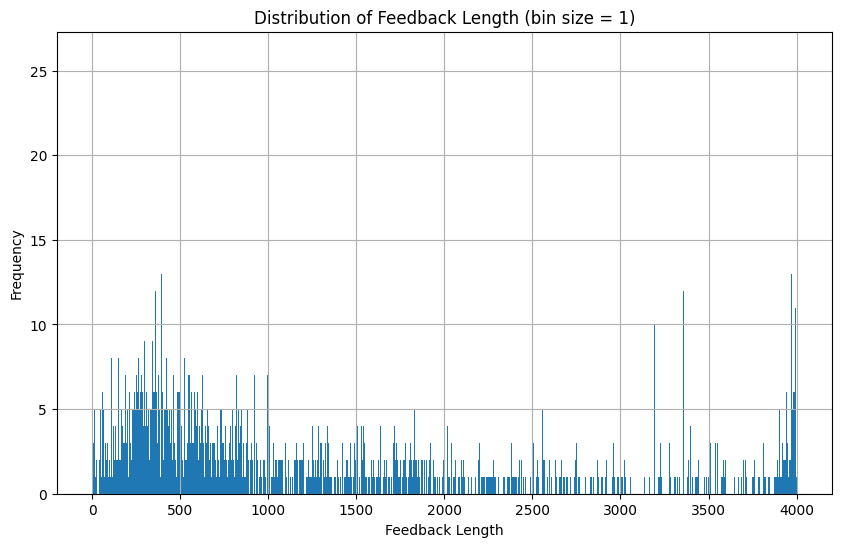

In [4]:
topic = 'AGRI'
bin_size = 1
SRC_DIR = 'D:/visualstudiocode/project/eufeedbackapp/src'
df = load_data(topic, SRC_DIR)
length_distribution = calculate_distribution(df, bin_size)
plot_feedback_length_distribution(length_distribution, bin_size)
    
    

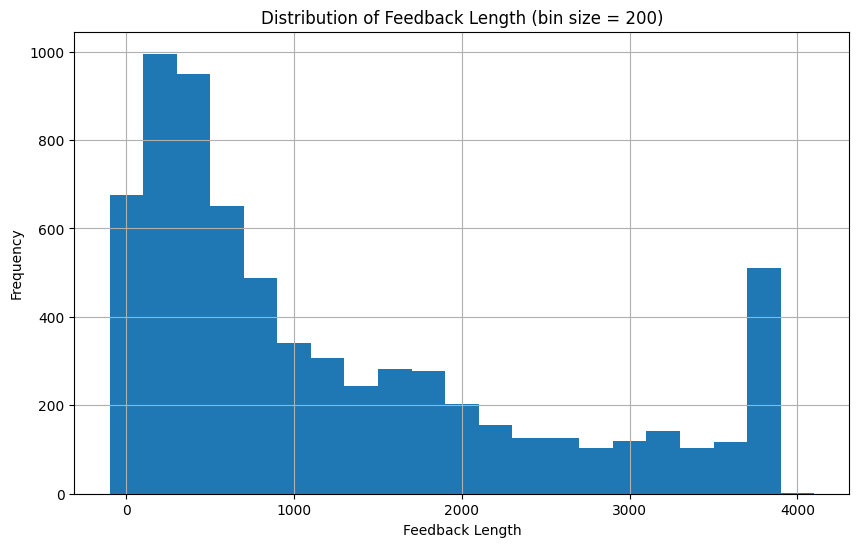

In [6]:
topics = config['topics']
bin_size = 200
SRC_DIR = 'D:/visualstudiocode/project/eufeedbackapp/src'
df = load_data(topic, SRC_DIR)
length_distribution = calculate_distribution(df, bin_size)
plot_feedback_length_distribution(length_distribution, bin_size)
    

### Print pie chart of feedback country and language distribution

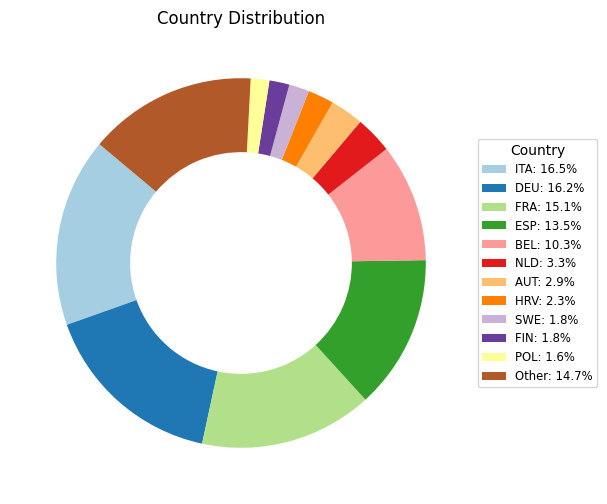

In [7]:
plot_pie_chart(df, 'country', 'Country Distribution', 1.6)


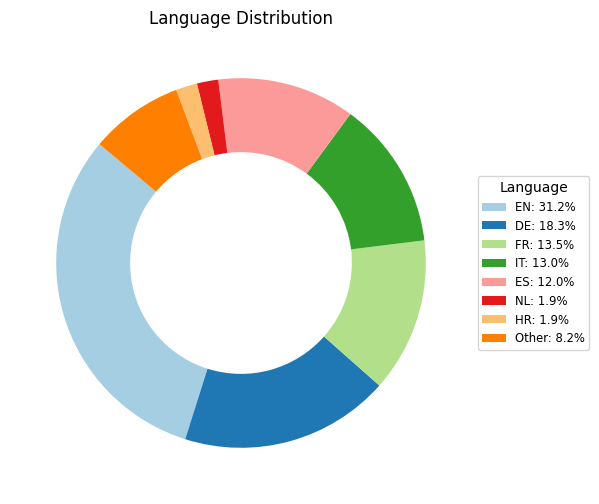

In [8]:
plot_pie_chart(df, 'language', 'Language Distribution', 1.5)